In [31]:
import numpy as np
import matplotlib.pyplot as plt



from pylab import *


from skrf.media import DistributedCircuit
from skrf import Frequency
from skrf import network
from skrf.network import *

from skrf import plotting 

import matplotlib.pyplot as plt

from IPython.display import Image  

%matplotlib inline

my_params = {
'figure.dpi': 240,
'figure.figsize': [10,10],
'figure.subplot.left' : 0.15,
'figure.subplot.right' : 0.9,
'figure.subplot.bottom' : 0.12,
'axes.titlesize' : 'medium',
'axes.labelsize' : 10 ,
'ytick.labelsize' :'small',
'xtick.labelsize' :'small',
'legend.fontsize' : 8, #small,
'legend.loc' : 'best',
'font.size' : 10.0,
'font.family' : 'serif',
'text.usetex' : False, # if you dont have latex
}
rcParams.update(my_params)

In [2]:
## Defino las funciones para agregar componentes en derivación (Zparal) y en serie (Yserie). 
## La salida es una variable Network de skrf

def Yserie(freq, ys, z0=50):
    y = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        y[i,0,0] =  ys
        y[i,0,1] = -ys
        y[i,1,0] = -ys
        y[i,1,1] =  ys
    a = network.y2s(y,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk


def Zparal(freq, zp, z0=50):
    z = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  zp
        z[i,0,1] =  zp
        z[i,1,0] =  zp
        z[i,1,1] =  zp
    a = network.z2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

## Convierte a network de skrf una impedancia de carga dada. 

def ZL(freq, zl, z0=50):
    z = np.empty(shape=(len(freq.f),1,1), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  zl
    a = network.z2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

## Convierte a network de skrf una admitancia de carga dada.
def YL(freq, yl, z0=50):
    y = np.empty(shape=(len(freq.f),1,1), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  yl
    a = network.y2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

# Calcula X dada una frecuencia y un valor de capacidad
def Xc(f, C):
    if C == 0 : x = -np.inf
    else      : x = -(2*np.pi*f*C)**-1 
    return x


# Calcula X dada una frecuencia y un valor de inductancia
def Xl(f, L):
    return (2*np.pi*f*L) 

# Calcula B dada una frecuencia y un valor de inductancia
def Bl(f, L):
    if L == 0 : y = -np.inf
    else      : y = -(2*np.pi*f*L)**-1 
    return y 

# Calcula B dada una frecuencia y un valor de capacidad
def Bc(f, C):
    return (2*np.pi*f*C) 


# print datos
def printZ(Z):
    r = Z.real
    x = Z.imag
    if x == 0 : Q = np.inf 
    else:     Q = abs(x/r)
    print('R = {:1.3e} ohms'.format(r))
    print('X = {:1.3e} ohms'.format(x))
    print('Q = {:1.2f} '.format(Q) )
    return

## Es importante correr el código siguiente en orden para no alterar los valores guardados en nw

 Los datos empleados para los calculos:
RL  =  2.0 ohm
C =  7.797e-09 F
rpcs  =  0.200 ohm
L  =  2.1187e-04 Hy
rpls  =  1.000 ohm
rg  =  50.00 ohm
ig  =  4.00 Ap



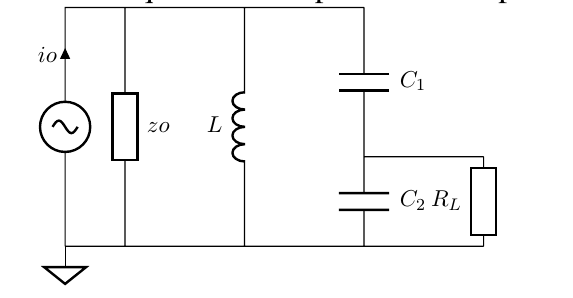

In [3]:
Image(filename= "fig/eje3.png",width=450)

In [27]:
#Los datos empleados para los calculos:
RL  =  100.0 
C1 =  2.645e-10 
C2 =  2.083e-09 
L  =  6.4458e-06 
rg  =  8100.00 
cg  =  1.00e-11 
ig  =  1.00e-05 

Qo =  100.000 

fo =  4e6
wo =  2*np.pi*fo


## Frecuencia de trabajo
freq = Frequency(fo/1e6,fo/1e6,1,'mhz')
print('fo = {:0.4} Hz'.format(float(freq.f) ) )

# impedancia de referencia
z0 = 400







fo = 4e+06 Hz


In [30]:
# Defino el valor de capacidad paralelo
C2p = np.linspace(C2/100, C2, 1000)

# Defino el valor de capacidad serie
C1s = np.linspace(C1, C1*100, 1000)[::-1]

# Defino el valor de inductancia paralelo
L1p = np.linspace(L, L*100, 1000)[::-1]


# Defino el valor de capacidad paralelo
Cgp = np.linspace(cg/100, cg, 1000)



## Sin perdidas !
nw1 =  ZL(freq,RL,z0)
nw  =  nw1 


for c in C2p:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw2 = cascade(nwa,nw1)
    nw  = stitch(nw,nw2 )
    
print('ZL')    
printZ(nw.z[-1,0,0])

for c in C1s:
    nwa = Yserie(freq,1j*Bc(freq.f[0],c),z0)
    nw3 = cascade(nwa,nw2)
    nw  = stitch(nw,nw3 )
    
print('')    
printZ(nw.z[-1,0,0])


for l in L1p:
    nwa = Zparal(freq,1j*Xl(freq.f[0],l),z0)
    nw4 = cascade(nwa,nw3)
    nw  = stitch(nw,nw4 )

print('')    
printZ(nw.z[-1,0,0])
  
    
for c in Cgp:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw5  = cascade(nwa,nw4)
    nw   = stitch(nw,nw5 )    

print('')    
printZ(nw.z[-1,0,0])



ZL
R = 3.520e+00 ohms
X = -1.843e+01 ohms
Q = 5.24 

R = 3.520e+00 ohms
X = -1.689e+02 ohms
Q = 47.97 

R = 1.554e+03 ohms
X = 3.191e+03 ohms
Q = 2.05 

R = 8.101e+03 ohms
X = 1.292e+02 ohms
Q = 0.02 


RL  = 100.000 ohms
Zin = 8101.213+129.198j ohms


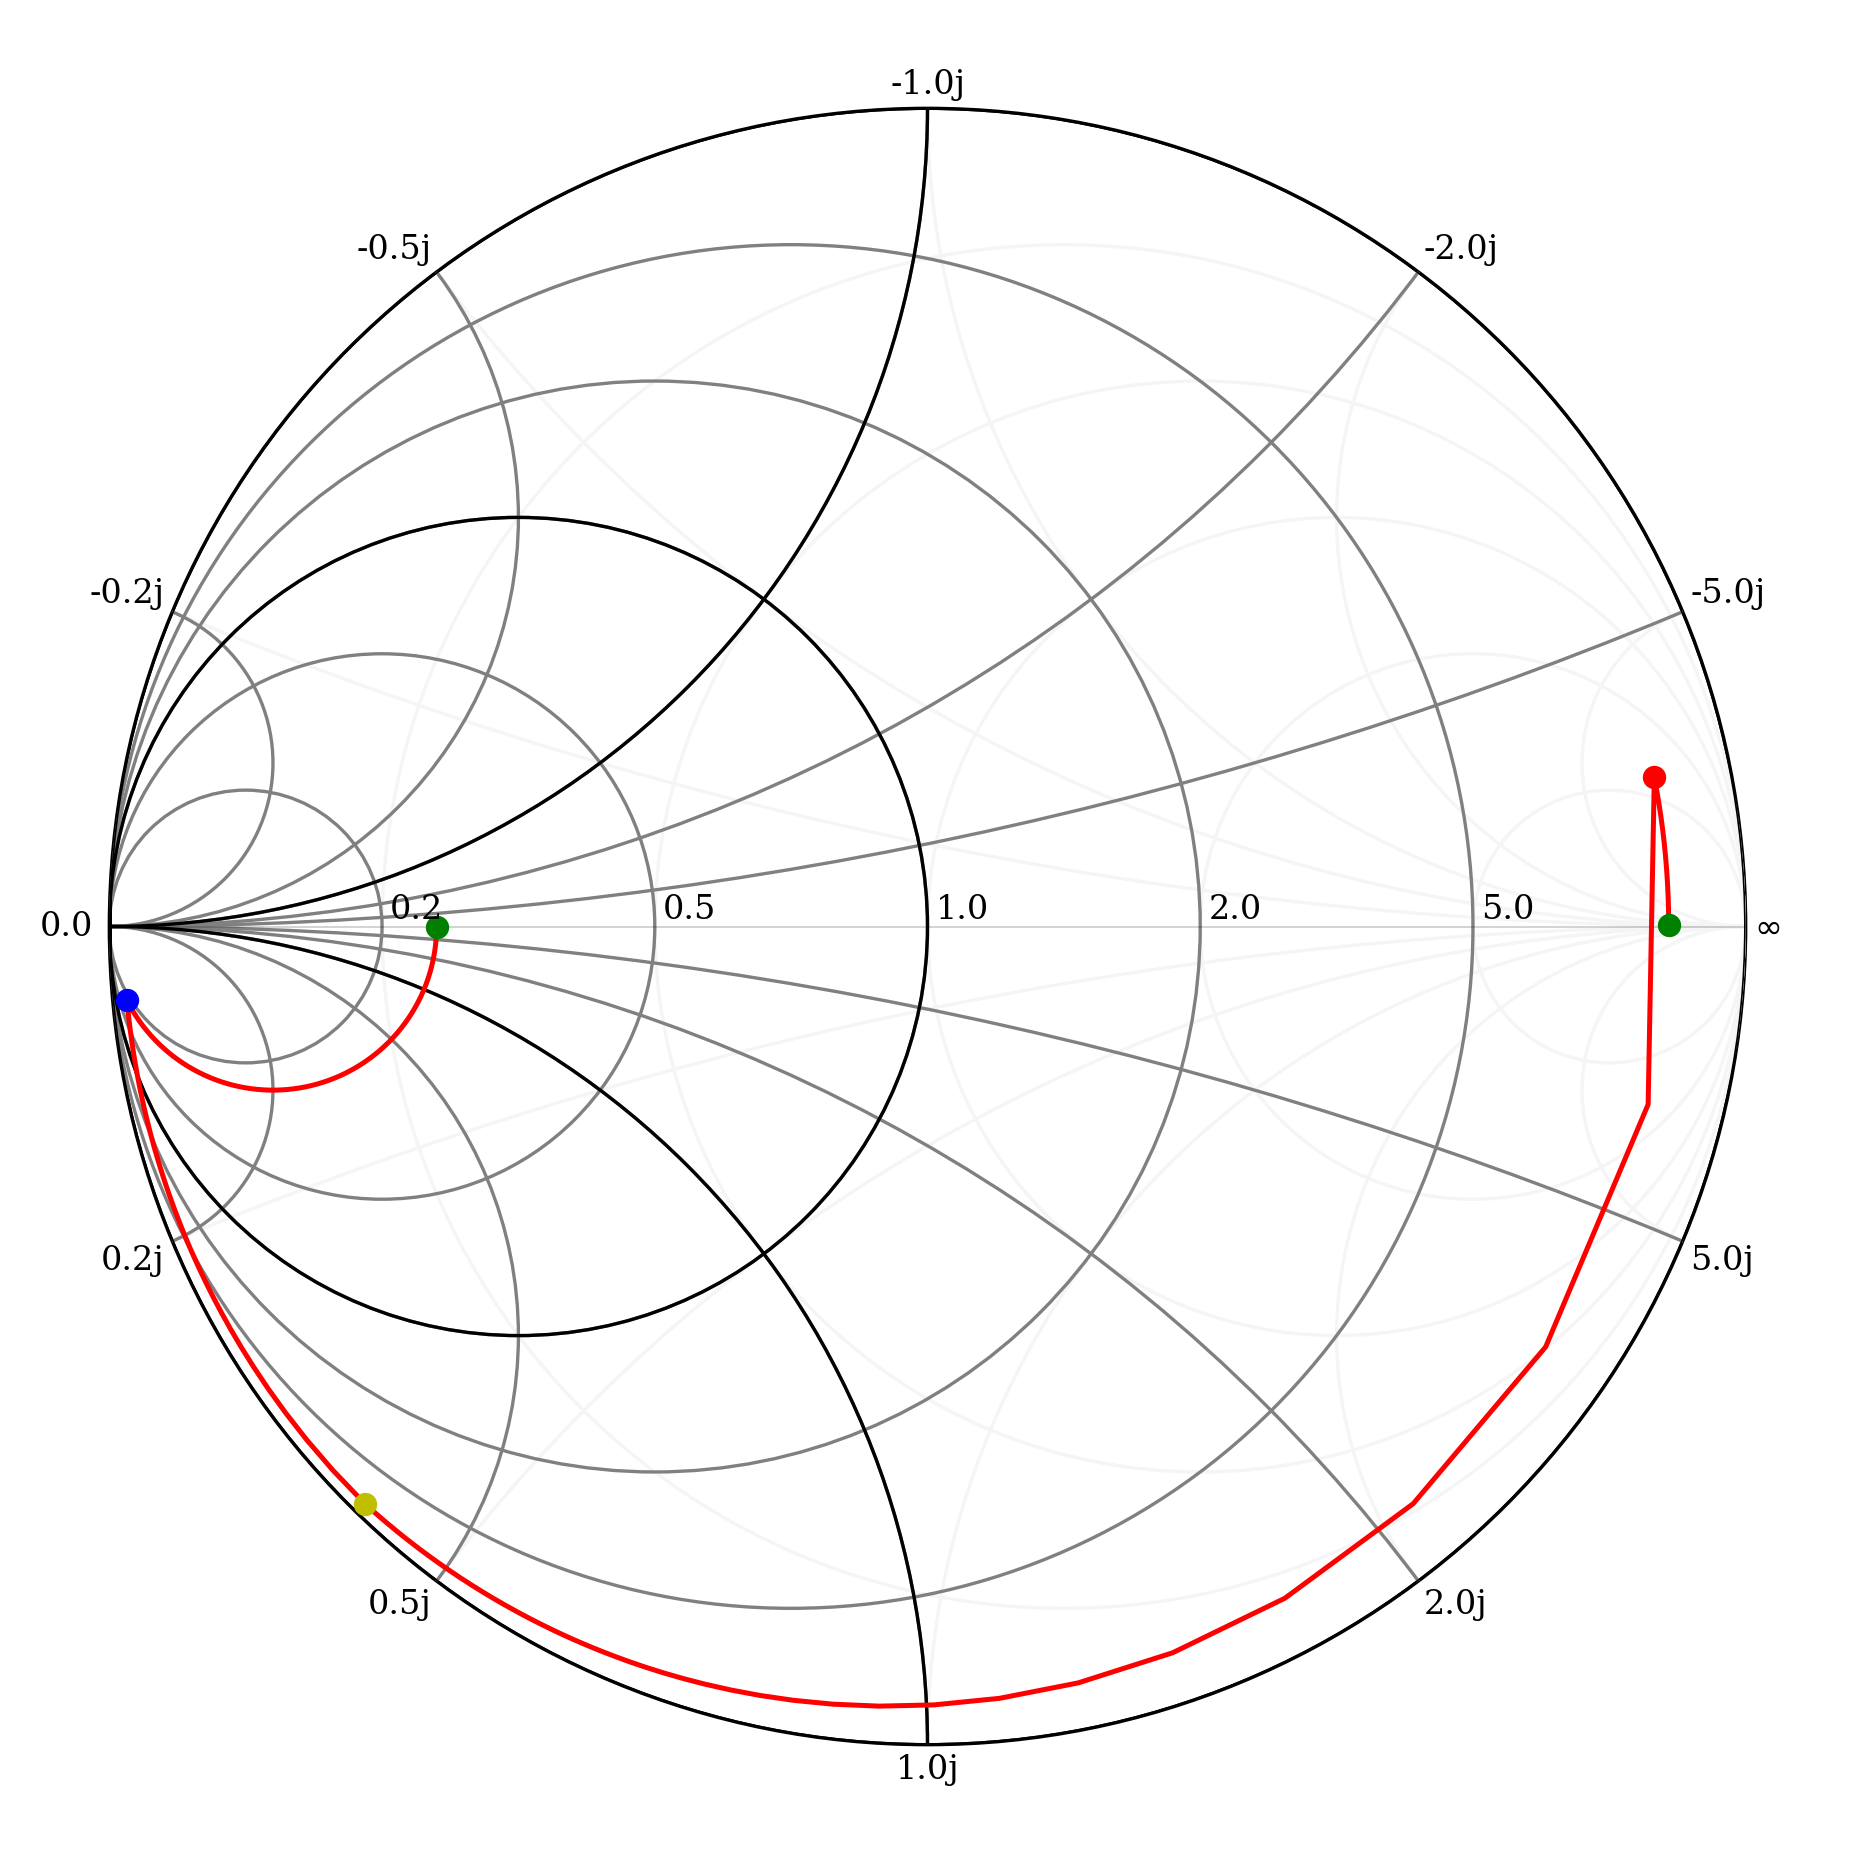

In [32]:
# plot


nw.plot_s_smith(m=0,n=0,color='r',draw_labels=True,show_legend = False, chart_type='yz')
#plotting.smith(draw_vswr=[100.0] )

nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o',)
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 
nw3.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw4.plot_s_smith(m=0,n=0,color='r',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw5.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')

print('RL  = {:1.3f} ohms'.format(nw.z[0,0,0].real))
print('Zin = {:1.3f} ohms'.format(nw.z[-1,0,0]))